# PROJECT 1 RED WINE QUALITY PREDICTION
# NAME - SUBHAM
# BATCH - DS2401

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df.shape

(1599, 12)

In [ ]:
#the dataset contains 1599 rows and 12 columns 

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
#except for quality datatype which is int64 other columns datatype is float64 which is rightfor every column.

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#dataset doesn't possess any null values

<Axes: >

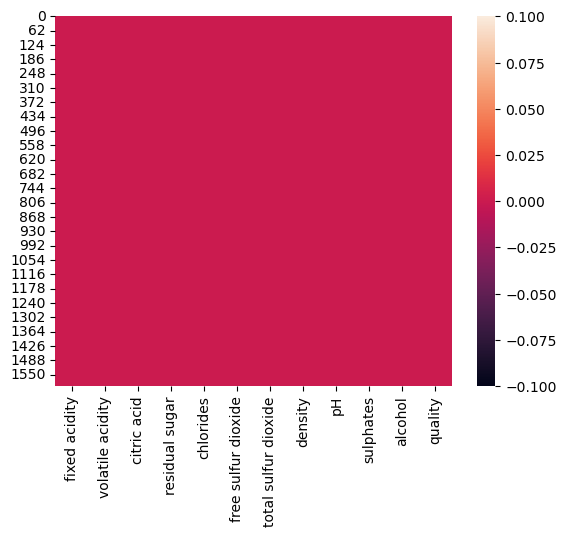

In [7]:
sns.heatmap(df.isnull())

In [ ]:
#this is also represented by heatmap that data doesn't have any null value

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#1599 columns are there from 0 to 1598 index which also tells that there are no null values. float64 datatypes is of 11 columns
#and int64 datatype is of 1 column. all columns have 1599 non null values meaning they don't have any null values.
# memory usage is 150kb 

In [11]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64
free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75


In [ ]:
# we can check all unique values and their value counts with this
# length represents unique values
#for fixed acidity there are 96 unique values and some of them have value counts like for 7.2 value occurs 67 times
# for volatile acidity there are 143 unique values and 0.600  occurs 47 times in dataset 
# just like this we can see all data set unique values and value counts

In [13]:
df['volatile acidity'].unique()

array([0.7  , 0.88 , 0.76 , 0.28 , 0.66 , 0.6  , 0.65 , 0.58 , 0.5  ,
       0.615, 0.61 , 0.62 , 0.56 , 0.59 , 0.32 , 0.22 , 0.39 , 0.43 ,
       0.49 , 0.4  , 0.41 , 0.71 , 0.645, 0.675, 0.685, 0.655, 0.605,
       0.38 , 1.13 , 0.45 , 0.67 , 0.52 , 0.935, 0.29 , 0.31 , 0.51 ,
       0.42 , 0.63 , 0.69 , 0.735, 0.725, 0.705, 0.785, 0.75 , 0.625,
       0.3  , 0.55 , 1.02 , 0.775, 0.9  , 0.545, 0.575, 0.33 , 0.54 ,
       1.07 , 0.695, 1.33 , 0.745, 1.04 , 0.715, 0.415, 0.34 , 0.68 ,
       0.95 , 0.53 , 0.64 , 0.885, 0.805, 0.73 , 0.37 , 0.835, 1.09 ,
       0.57 , 0.44 , 0.635, 0.82 , 0.48 , 1.   , 0.21 , 0.35 , 0.975,
       0.26 , 0.87 , 0.18 , 0.27 , 0.2  , 0.36 , 0.83 , 0.46 , 0.47 ,
       0.77 , 0.815, 0.795, 0.665, 0.765, 0.24 , 0.85 , 0.84 , 0.96 ,
       0.78 , 0.23 , 0.315, 0.365, 0.25 , 0.825, 0.72 , 0.595, 0.585,
       0.915, 0.755, 0.845, 1.24 , 0.8  , 0.98 , 1.185, 0.92 , 1.035,
       1.025, 0.565, 0.74 , 1.115, 0.865, 0.875, 0.965, 0.91 , 0.89 ,
       1.01 , 0.305,

In [ ]:
# or we can see unique values for each column this way

# description of dataset

In [16]:
#statistical summary of numerical column
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# 1)count is 1599 in all column which tells there is no null value
# 2)mean of fixed acidity and total sulphur dioxide is greater than median(50%) other mean and medians are almost same 
#   which tells us that fixed acidity and total sulphur dioxide data is right skewed
# 3)there is a jump in the values of 75% percentile and max in total sulphur dioxide and free sulphur dioxide meaning they have
#   outliers present in it.then residual sugar and fixed acidity have a little jumped values meaning small outliers maybe present
# 4)we can also observe standard deviation, 25%,50%, min etc values 

<Axes: >

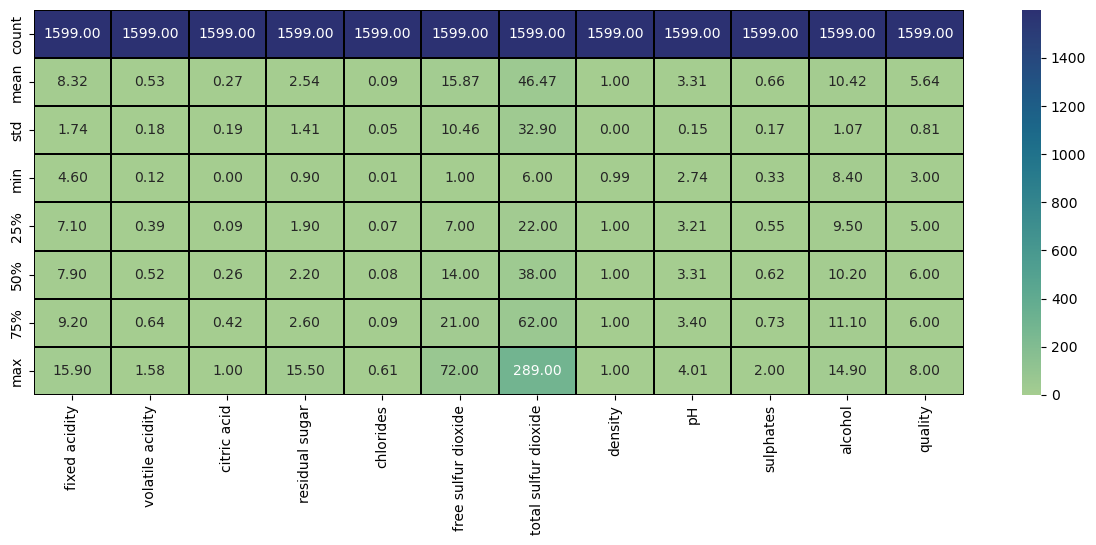

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.describe(),annot=True ,fmt='0.2f' ,linewidth=0.2,linecolor='black',cmap='crest' )

In [ ]:
# same statistical summary can also be seen through heatmap

# checking skewness

In [38]:
b=df.columns
b

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: xlabel='fixed acidity', ylabel='Density'>

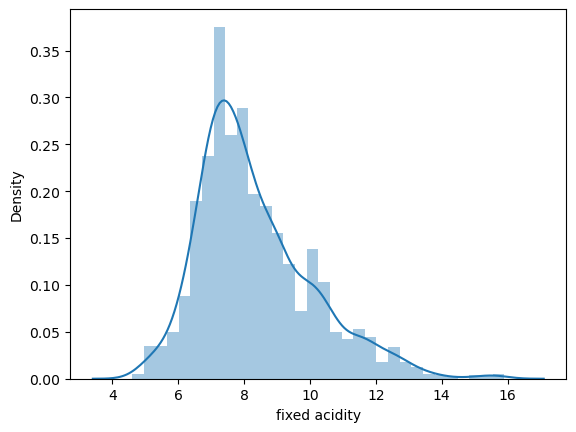

In [58]:
plt.subplot(1,1,1)
sns.distplot(df['fixed acidity'])
# checking skewness for a single column
# we can see here it is a little right skewed 

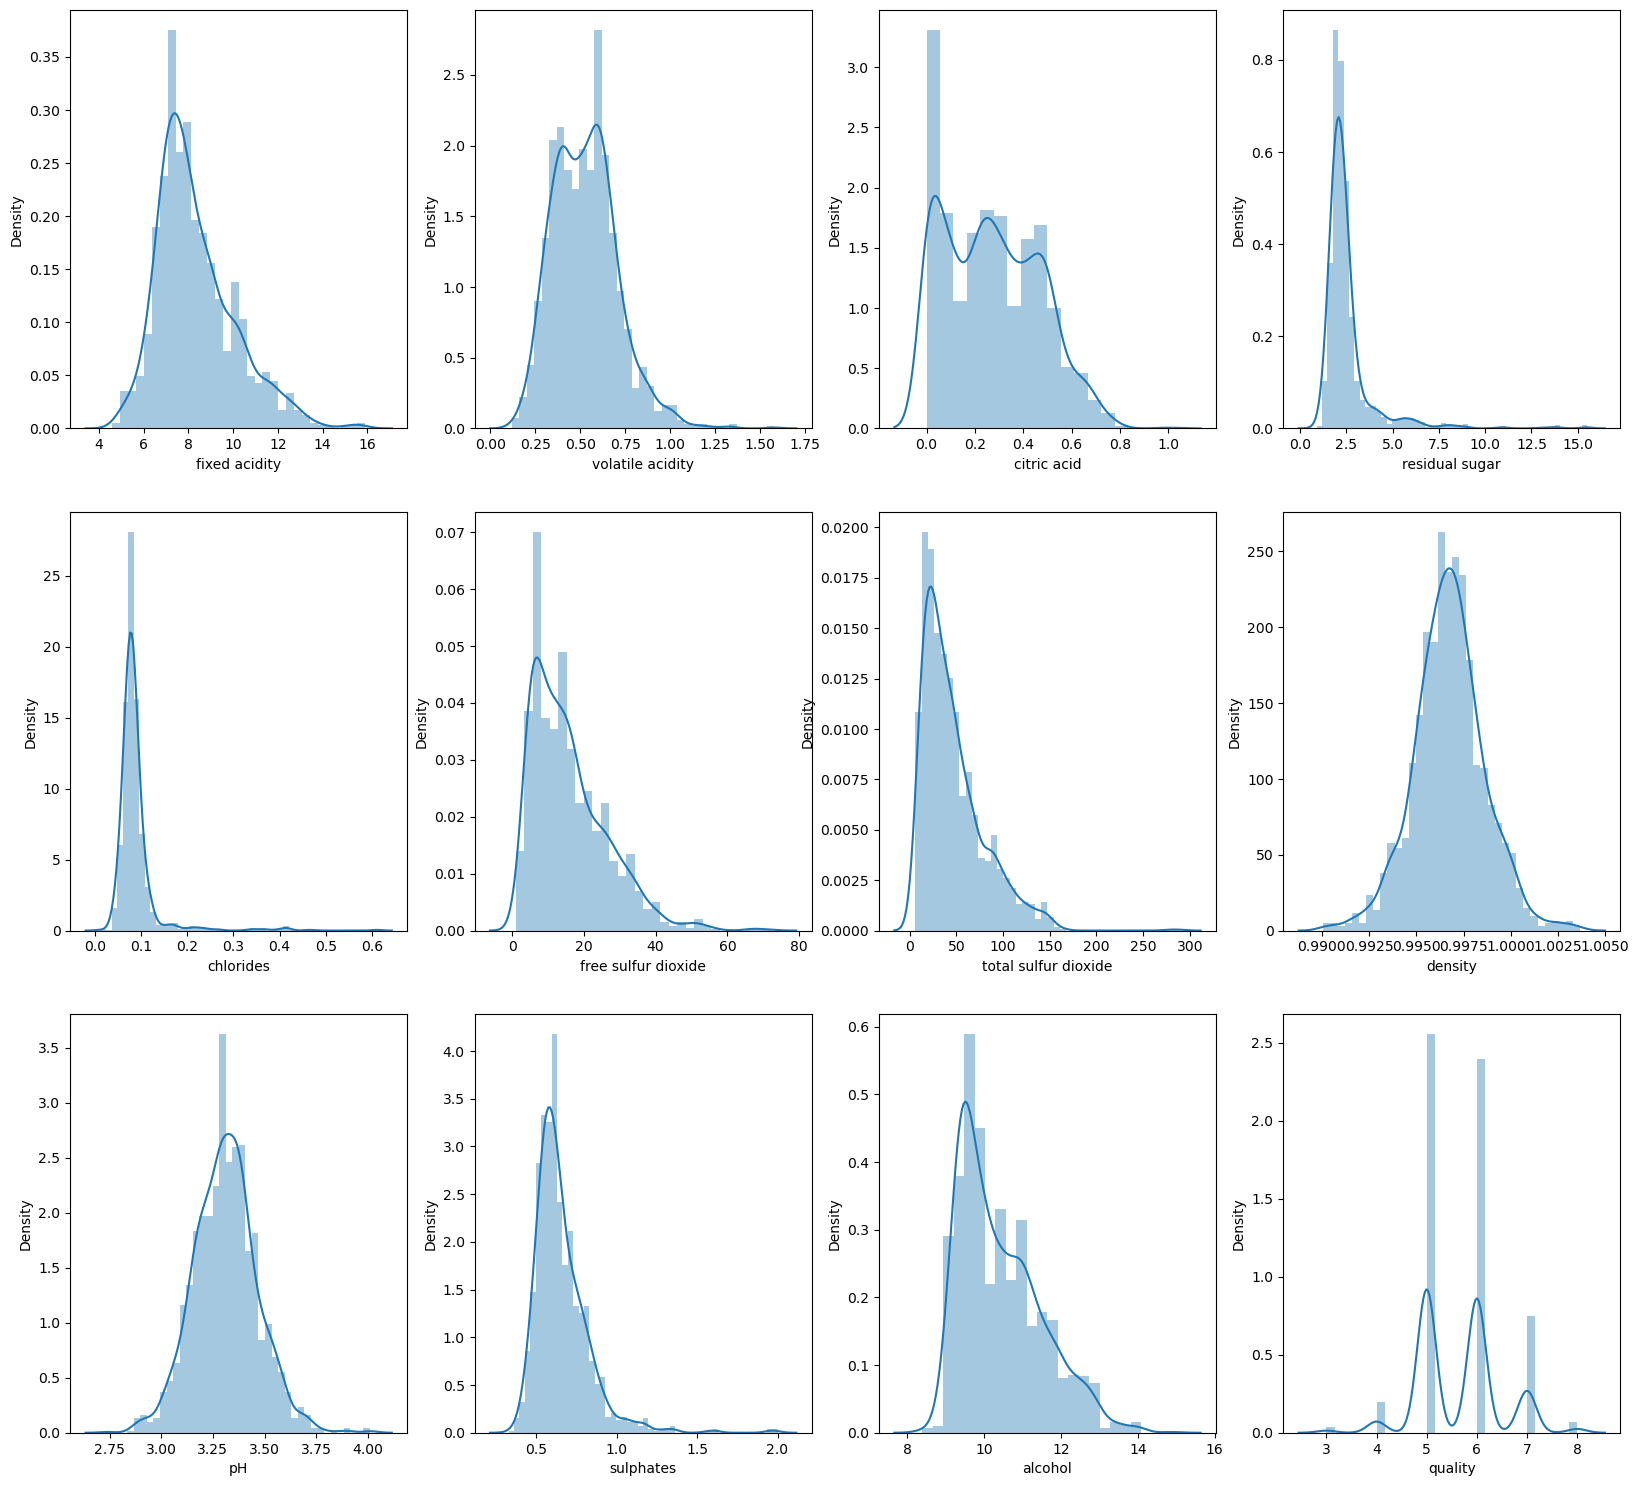

In [49]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in b:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1


In [ ]:
#we can see that the most columns are right skewed

In [43]:
#we can check numerical value of skewness too
# acceptable range of skewness is +0.5 to -0.5
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [ ]:
#we can see that most columns are right skewed and residual sugar and chlorides are highly right skewed
# + values means pight skewed

In [60]:
#removing skewness using cuberoot method
df['chlorides']=np.cbrt(df['chlorides'])
df['residual sugar']=np.cbrt(df['residual sugar'])
df['fixed acidity']=np.cbrt(df['fixed acidity'])
df['volatile acidity']=np.cbrt(df['volatile acidity'])
df['free sulfur dioxide']=np.cbrt(df['free sulfur dioxide'])
df['total sulfur dioxide']=np.cbrt(df['total sulfur dioxide'])
df['sulphates']=np.cbrt(df['sulphates'])
df['alcohol']=np.cbrt(df['alcohol'])

In [ ]:
#  for removal of skewness there are various method like log transform, cuberoot, boxcox etc

In [61]:
df.skew()

fixed acidity           0.458470
volatile acidity       -0.310976
citric acid             0.318337
residual sugar          2.032658
chlorides               2.191305
free sulfur dioxide    -0.068947
total sulfur dioxide    0.076953
density                 0.071288
pH                      0.193683
sulphates               1.046979
alcohol                 0.725907
quality                 0.217802
dtype: float64

In [ ]:
# after removal of skewness we check skewness and get that there is still a little skewness is present in residual sugar and 
#chlorides and sulphates and alcohol
# to perform another removing skewness method we have to take the before removing skewness data 

In [62]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [63]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [67]:
#removing skewness using log method
df['chlorides']=np.log(df['chlorides'])
df['residual sugar']=np.log(df['residual sugar'])
df['fixed acidity']=np.log(df['fixed acidity'])
df['volatile acidity']=np.log(df['volatile acidity'])
df['free sulfur dioxide']=np.log(df['free sulfur dioxide'])
df['total sulfur dioxide']=np.log(df['total sulfur dioxide'])
df['sulphates']=np.log(df['sulphates'])
df['alcohol']=np.log(df['alcohol'])

In [ ]:
#here we used log method

In [68]:
df.skew()

fixed acidity           0.393915
volatile acidity       -0.434385
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide    -0.234031
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
sulphates               0.921867
alcohol                 0.661856
quality                 0.217802
dtype: float64

In [ ]:
#but still a little skewness is still present

In [217]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [174]:
n=df.iloc[:,-1]
n

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [177]:
n.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [185]:
n.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [180]:
n1= pd.cut(n, bins=[0,7,8], labels=[ "poor/0", "good/1"]) 
n1

0       poor/0
1       poor/0
2       poor/0
3       poor/0
4       poor/0
         ...  
1594    poor/0
1595    poor/0
1596    poor/0
1597    poor/0
1598    poor/0
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['poor/0' < 'good/1']

In [263]:
n1= pd.cut(n, bins=[0,7,8], labels=[0,1]) 
n1

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: category
Categories (2, int64): [0 < 1]

In [181]:
n1.value_counts()

quality
poor/0    1581
good/1      18
Name: count, dtype: int64

In [188]:
n2=df.iloc[:,:-1]
n2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [190]:
df3=pd.concat([n2,n1],axis=1,join='inner')
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,poor/0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,poor/0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,poor/0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,poor/0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,poor/0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,poor/0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,poor/0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,poor/0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,poor/0


In [265]:
df3=pd.concat([n2,n1],axis=1,join='inner')
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [83]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [84]:
from scipy.stats import boxcox
#removing skewness using boxcox method
df['chlorides']=boxcox(df['chlorides'],0)
df['residual sugar']=boxcox(df['residual sugar'],0)
df['fixed acidity']=boxcox(df['fixed acidity'],0)
df['volatile acidity']=boxcox(df['volatile acidity'],0)
df['free sulfur dioxide']=boxcox(df['free sulfur dioxide'],0)
df['total sulfur dioxide']=boxcox(df['total sulfur dioxide'],0)
df['sulphates']=boxcox(df['sulphates'],0)
df['alcohol']=boxcox(df['alcohol'],0)

In [85]:
df.skew()

fixed acidity           0.393915
volatile acidity       -0.434385
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide    -0.234031
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
sulphates               0.921867
alcohol                 0.661856
quality                 0.217802
dtype: float64

In [ ]:
# even with boxcox method using log transform values are similar to log method and skeness is present
#but we have reduced skewness a lot

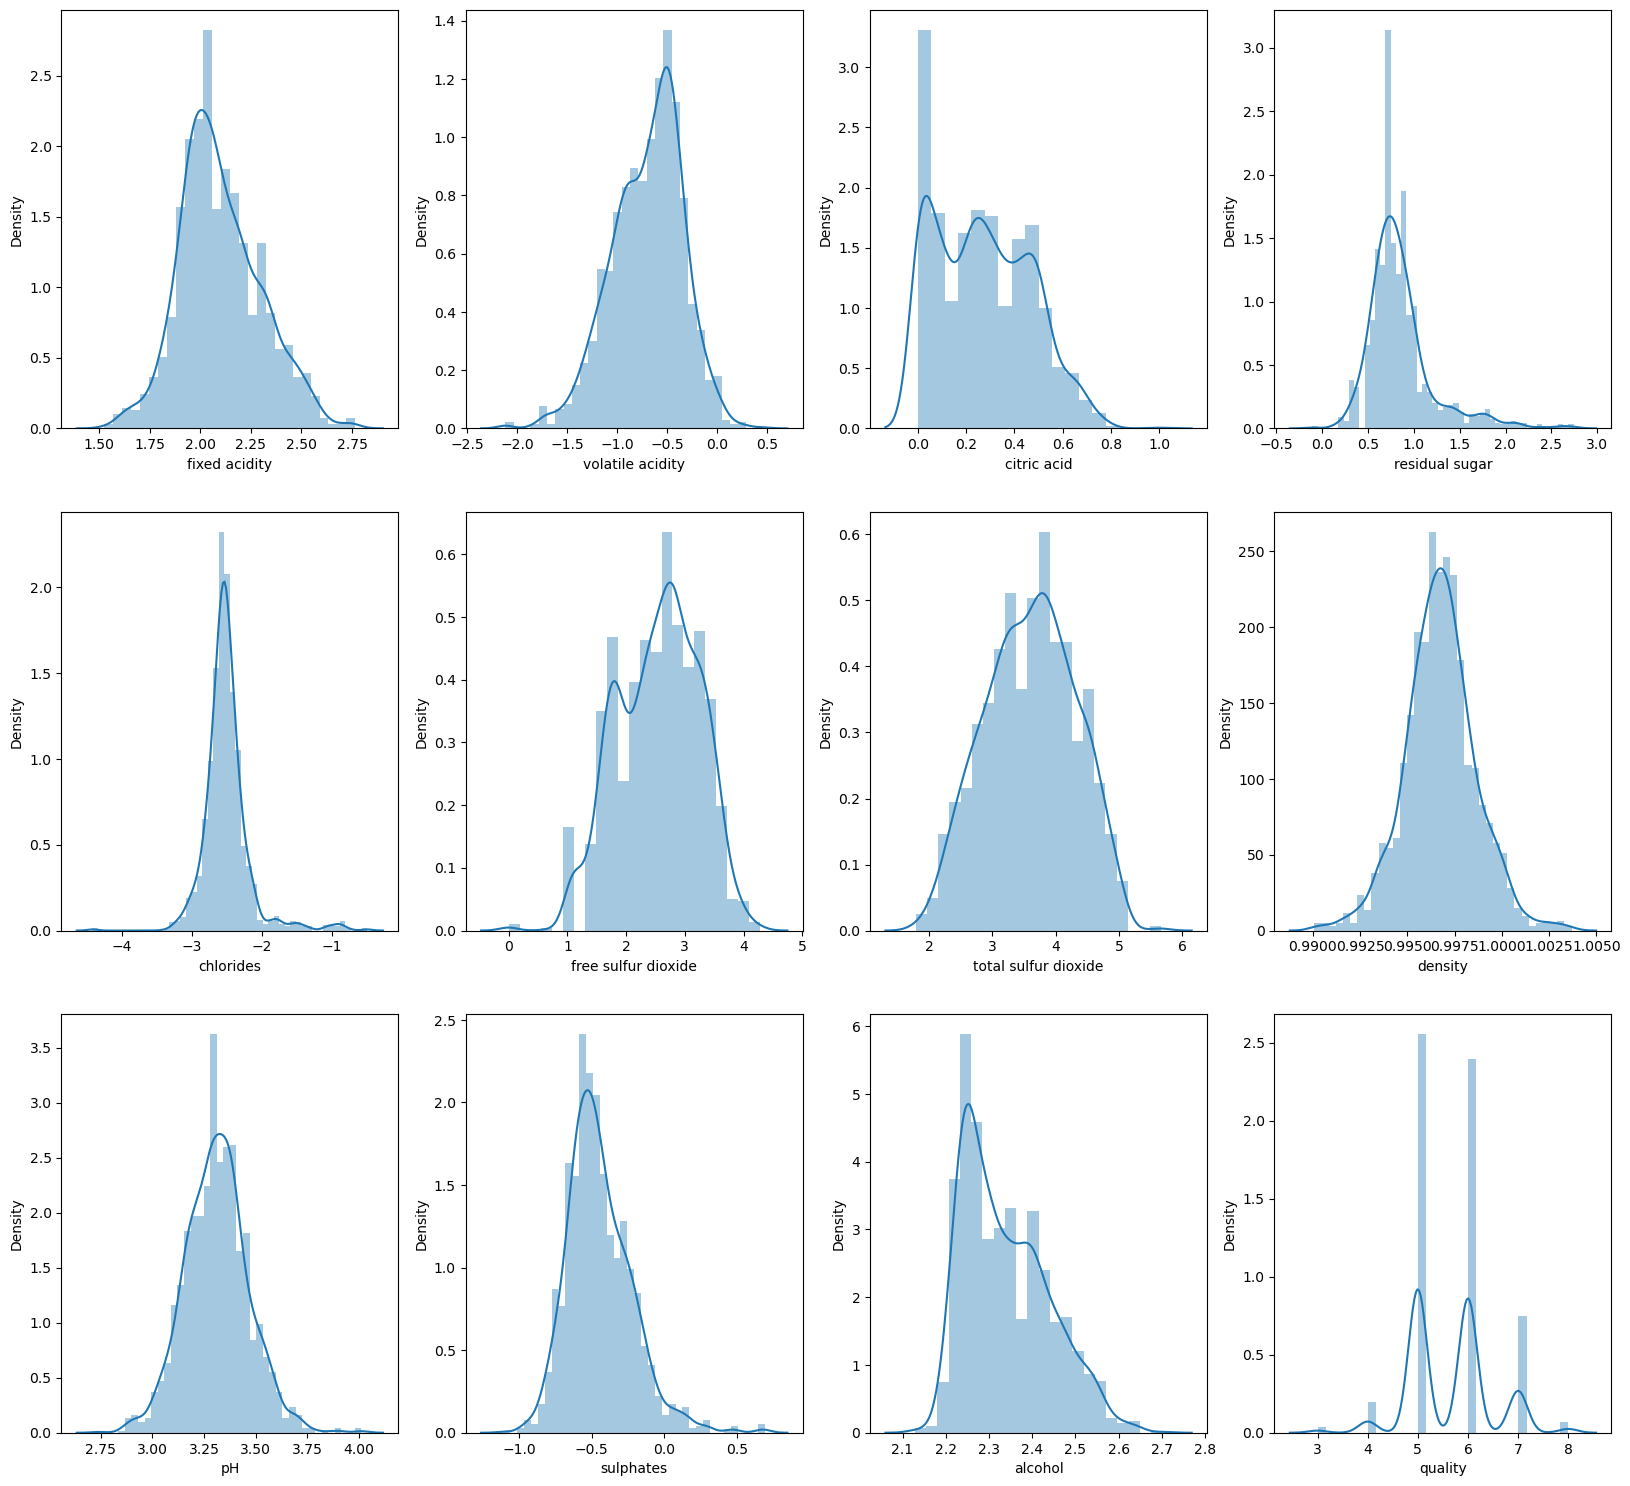

In [86]:
plt.figure(figsize=(20,25))
p=1
for i in b:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1


In [ ]:
# we can see in the distplot that mostly the data has become normal distribution

# checking for outliers

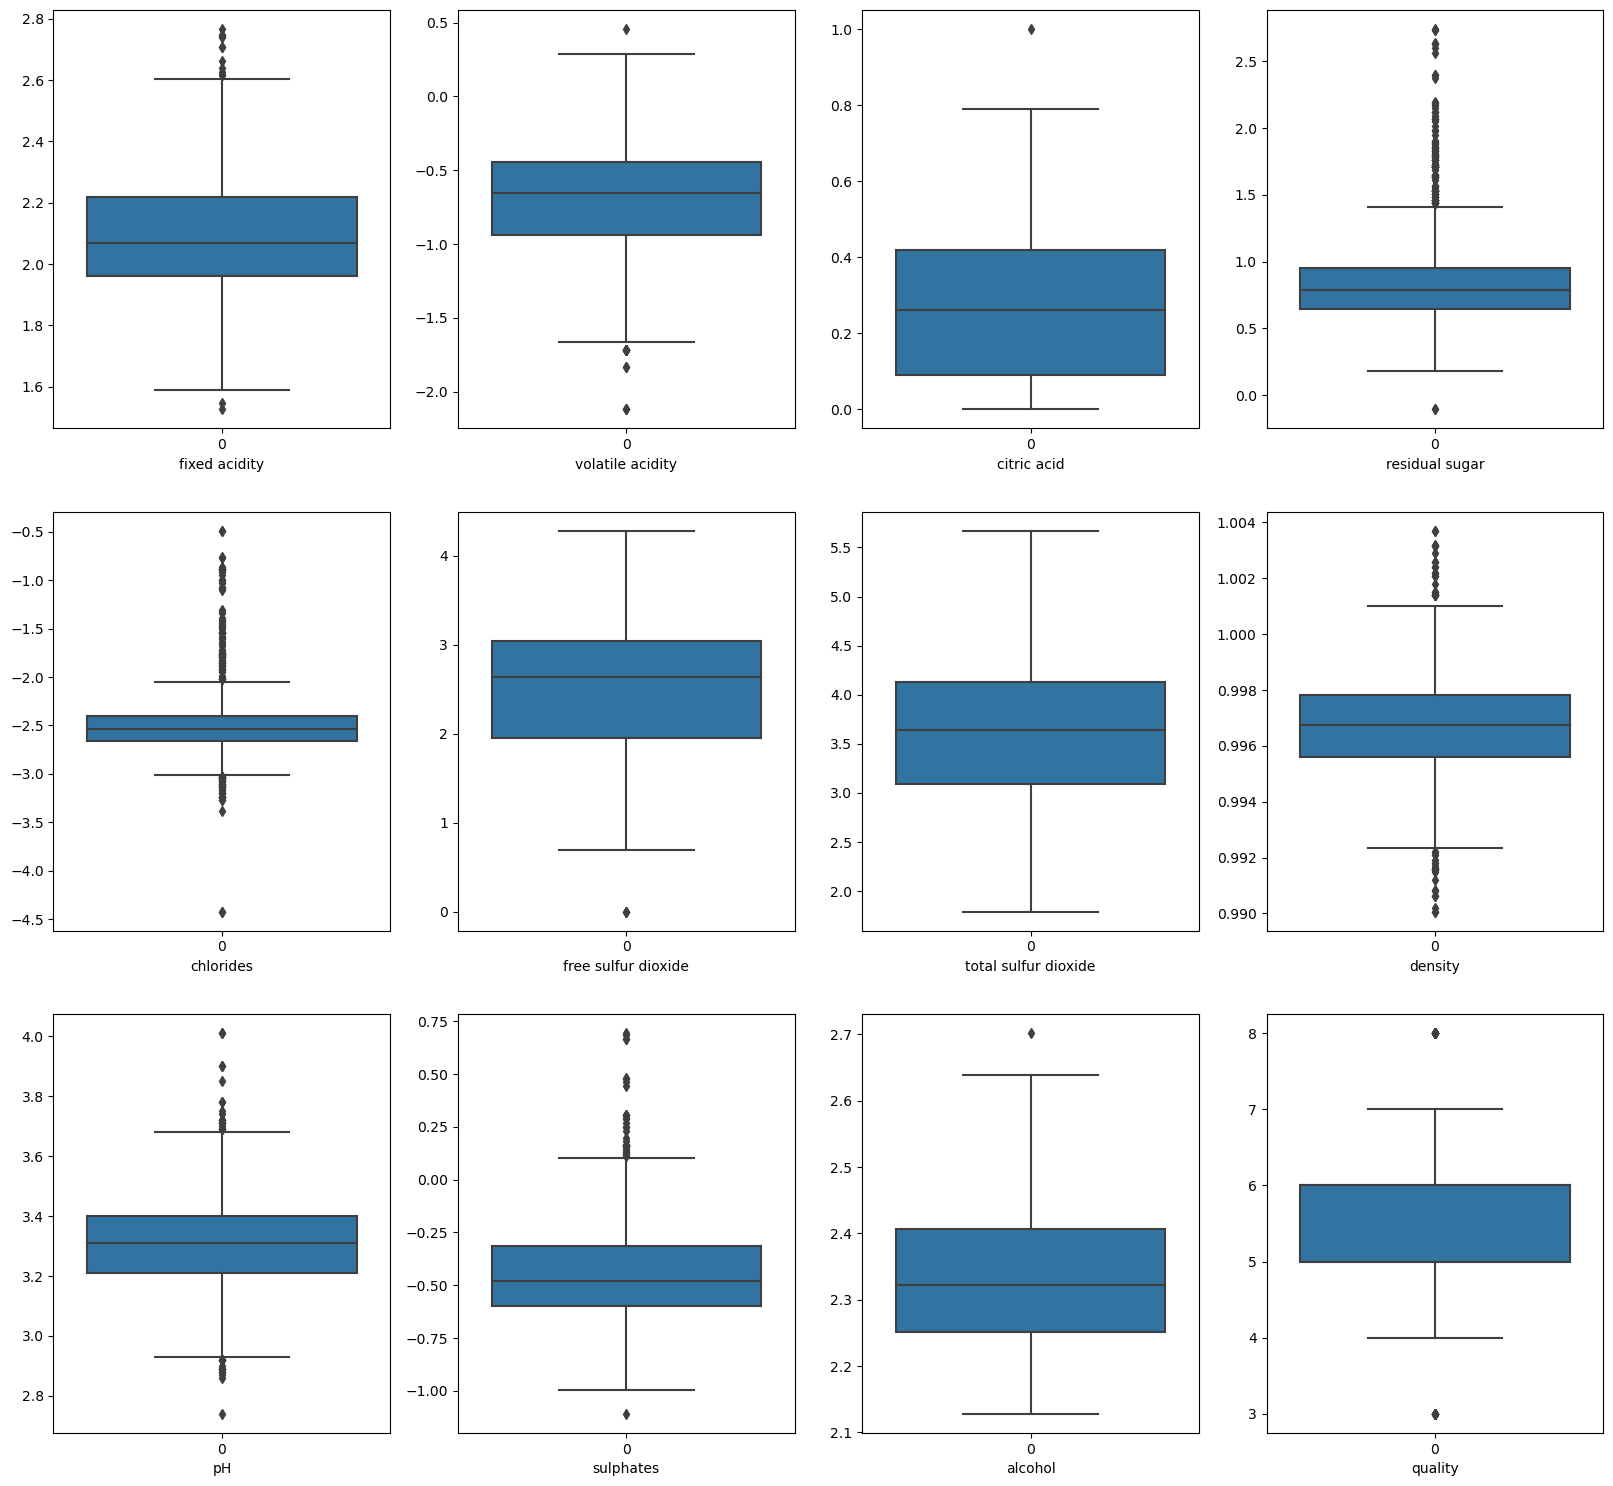

In [98]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in b:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


In [ ]:
# we can see from plots that most columns have outliers

Text(0.5, 0, 'fixed acidity')

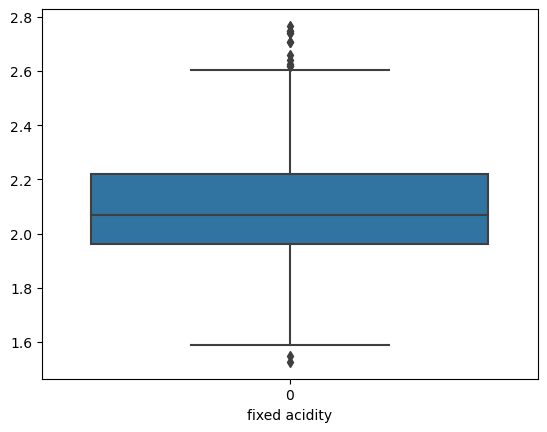

In [95]:
# for single boxplot visualization
sns.boxplot(df['fixed acidity'])
plt.xlabel('fixed acidity')

In [102]:
#removing outliers
from scipy.stats import zscore
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [270]:
c=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','total sulfur dioxide','free sulfur dioxide','density','pH', 'sulphates', 'alcohol', 'quality']]
z=np.abs(zscore(c))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.466193,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.624363,0.872638,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.229047,0.083669,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.411500,0.107592,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.466193,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,0.075043,1.542054,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,0.137820,2.211469,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,0.196679,1.255161,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,0.075043,1.542054,0.676657,1.677400,0.305990,0.209308,0.787823


In [198]:
# above table shows z score of all columns 
# z score less than 3 contains 99.7% data

In [268]:
#threshold=3
np.where(z>3)
#z score greater than 3 meaning outliers
# these values represent outliers

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [271]:
df1=z[(z<3).all(axis=1)]
df1
# we will select/choose only that data having z score less than 3 thus removing outlier values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.466193,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.624363,0.872638,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.229047,0.083669,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.411500,0.107592,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.466193,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,0.075043,1.542054,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,0.137820,2.211469,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,0.196679,1.255161,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,0.075043,1.542054,0.676657,1.677400,0.305990,0.209308,0.787823


In [272]:
df.shape
#old dataset rows are 1599

(1599, 12)

In [273]:
df1.shape
#new dataset rows are 1483
#148 rows were removed having ouliers

(1451, 12)

In [274]:
#this is percentage loss od data. max data that we can afford to lose is 10%
# since our value is 9.25% we lose 9.25% data which is within 10% range
#we cannot lose too much data as some data might be essential for midel building
(df.shape[0]-df1.shape[0])/(df.shape[0])*100

9.255784865540964

# check for correlation and multicollinearity

In [275]:
df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,free sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.042721,0.425769,0.051662,0.065773,-0.101041,-0.005723,0.444644,0.453501,-0.019635,-0.001630,0.033516
volatile acidity,-0.042721,1.000000,0.100841,0.015472,0.076590,-0.016540,0.033067,-0.003691,0.020522,0.130904,0.020566,0.145180
citric acid,0.425769,0.100841,1.000000,0.080787,0.059419,-0.063978,0.033280,0.192847,0.226820,0.011477,0.043864,0.091386
residual sugar,0.051662,0.015472,0.080787,1.000000,0.052676,0.078184,0.079270,0.037171,-0.031826,0.079984,0.030455,0.136762
chlorides,0.065773,0.076590,0.059419,0.052676,1.000000,0.026124,0.081385,0.137150,0.045595,0.062364,0.180591,0.039449
total sulfur dioxide,-0.101041,-0.016540,-0.063978,0.078184,0.026124,1.000000,0.224738,-0.047886,-0.034102,0.030138,0.077289,0.052682
free sulfur dioxide,-0.005723,0.033067,0.033280,0.079270,0.081385,0.224738,1.000000,-0.005345,-0.002204,0.120765,-0.024841,0.045540
density,0.444644,-0.003691,0.192847,0.037171,0.137150,-0.047886,-0.005345,1.000000,0.166370,0.047691,0.303126,0.058454
pH,0.453501,0.020522,0.226820,-0.031826,0.045595,-0.034102,-0.002204,0.166370,1.000000,-0.039229,0.036959,0.034286
sulphates,-0.019635,0.130904,0.011477,0.079984,0.062364,0.030138,0.120765,0.047691,-0.039229,1.000000,0.032592,0.102943


In [242]:
# we can  see from df1 data above that most colums are not correlated with each other and target variable

In [276]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# but previous data have correlation with each other and target variable

<Axes: >

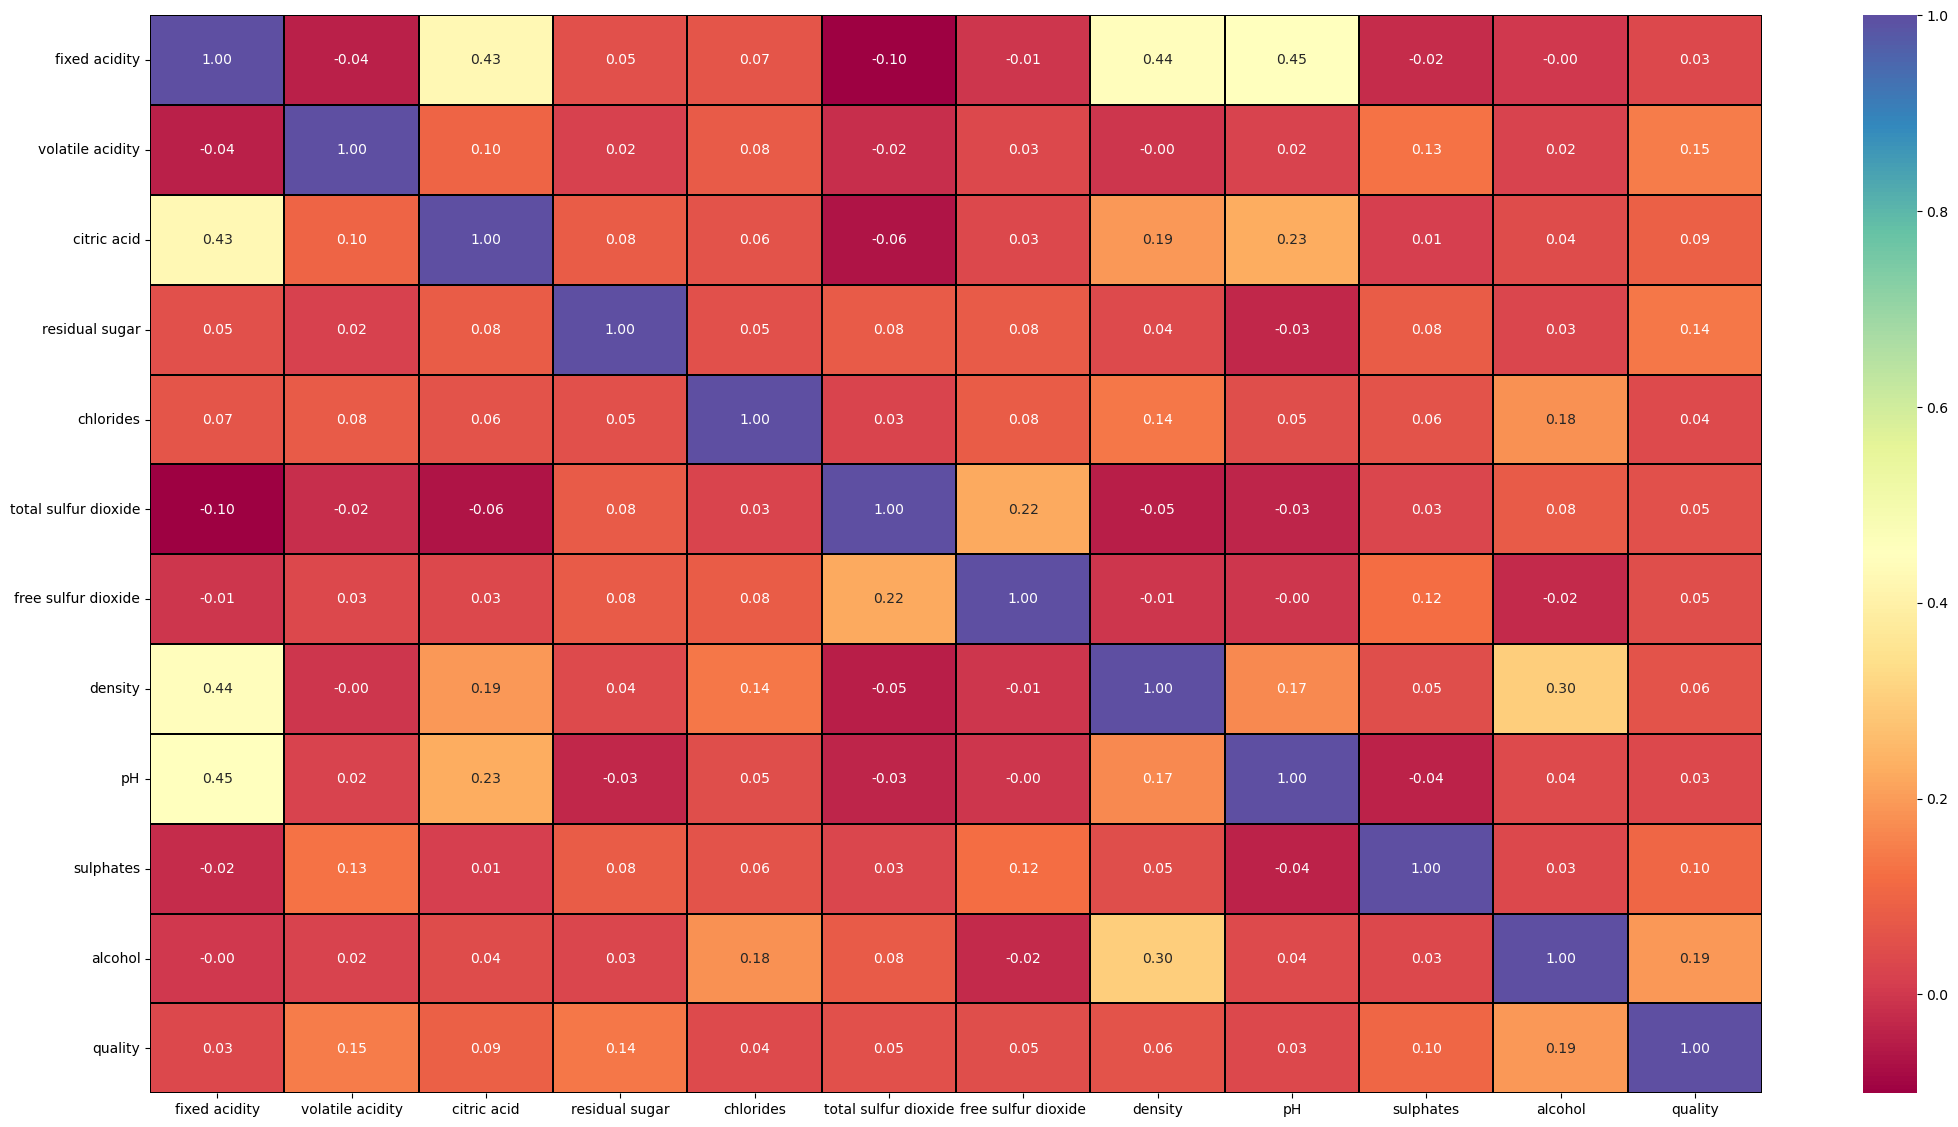

In [277]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for new dataset

<Axes: >

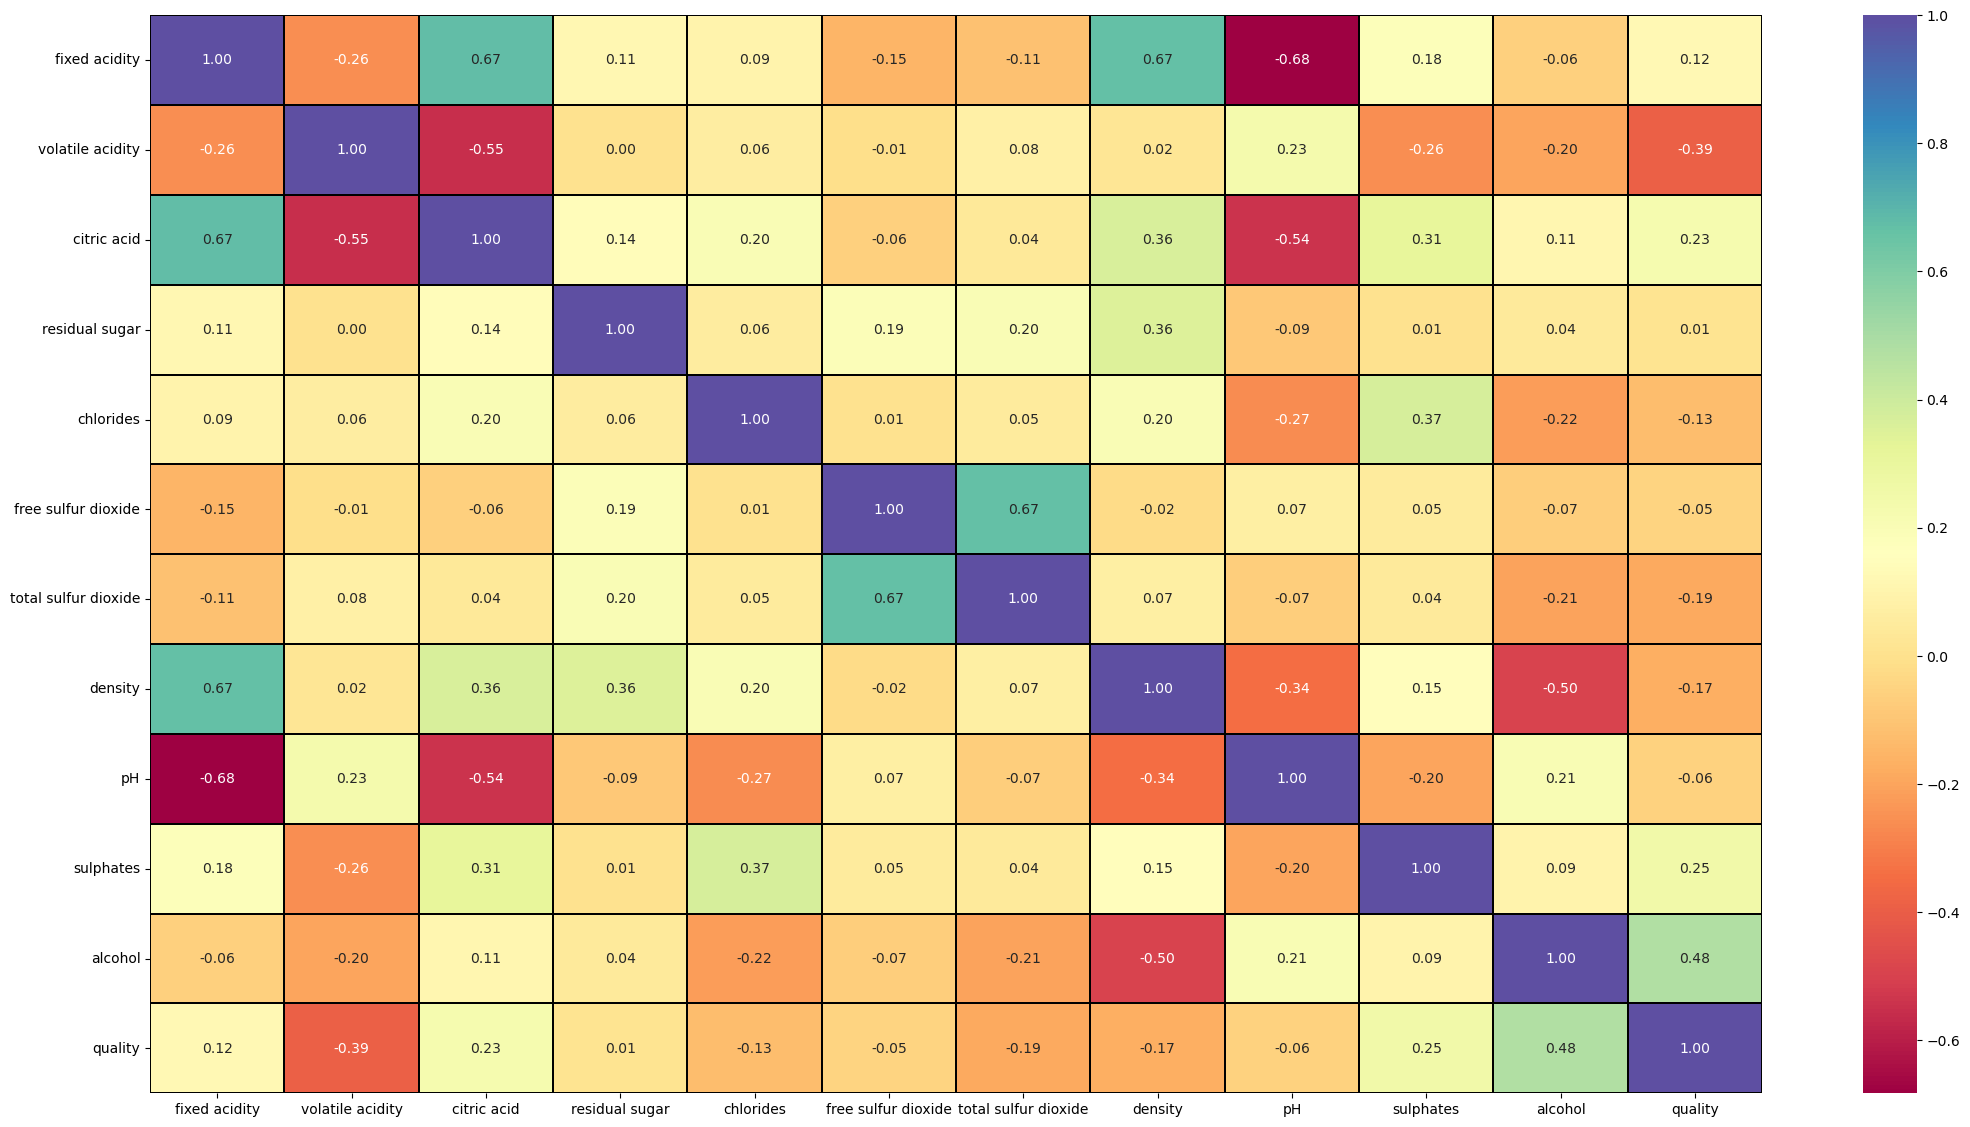

In [278]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heatmap for old dataset

In [279]:
# standard scaler is done so as to make all values from whole data on the same level/range.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df2=pd.DataFrame(s.fit_transform(df1),columns=df1.columns)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.397627,0.357017,1.083832,0.036090,-0.289824,-0.646006,-0.526112,-0.268236,1.011339,-0.090093,0.304871,-0.085553
1,-0.801099,2.197363,1.083832,-0.893988,-0.351957,-0.186084,0.272669,-1.202472,-0.008697,-1.073111,-0.403178,-0.085553
2,-0.801099,0.970466,0.683163,-0.607996,-0.751487,-0.927487,-1.277879,-1.015625,-0.705970,-1.249652,-0.403178,-0.085553
3,1.580117,1.130382,1.264621,0.036090,-0.223236,-0.585301,-1.230864,-0.081389,0.456152,-0.347773,-0.403178,-0.762320
4,-0.397627,0.357017,1.083832,0.036090,-0.289824,-0.646006,-0.526112,-0.268236,1.011339,-0.090093,0.304871,-0.085553
...,...,...,...,...,...,...,...,...,...,...,...,...
1446,0.812789,-0.665398,0.282495,-0.124932,-0.884664,-1.216316,1.588260,0.472948,0.314066,-0.347773,-1.369605,-0.085553
1447,1.115393,-1.176605,0.082161,-0.446975,0.642414,-1.098580,2.903852,0.267416,1.127551,-0.042392,-0.130519,-0.762320
1448,0.711921,-1.221172,-0.218340,-0.607996,-0.289824,-0.988192,1.024436,-0.311810,-0.034570,-0.171232,-0.484544,-0.762320
1449,1.115393,-0.205311,-0.118173,-0.124932,-0.223236,-1.216316,1.588260,-0.059567,1.708612,-0.686592,-1.111227,-0.085553


In [294]:
df5=df2.iloc[:,:-1]
df5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,free sulfur dioxide,density,pH,sulphates,alcohol
0,-0.397627,0.357017,1.083832,0.036090,-0.289824,-0.646006,-0.526112,-0.268236,1.011339,-0.090093,0.304871
1,-0.801099,2.197363,1.083832,-0.893988,-0.351957,-0.186084,0.272669,-1.202472,-0.008697,-1.073111,-0.403178
2,-0.801099,0.970466,0.683163,-0.607996,-0.751487,-0.927487,-1.277879,-1.015625,-0.705970,-1.249652,-0.403178
3,1.580117,1.130382,1.264621,0.036090,-0.223236,-0.585301,-1.230864,-0.081389,0.456152,-0.347773,-0.403178
4,-0.397627,0.357017,1.083832,0.036090,-0.289824,-0.646006,-0.526112,-0.268236,1.011339,-0.090093,0.304871
...,...,...,...,...,...,...,...,...,...,...,...
1446,0.812789,-0.665398,0.282495,-0.124932,-0.884664,-1.216316,1.588260,0.472948,0.314066,-0.347773,-1.369605
1447,1.115393,-1.176605,0.082161,-0.446975,0.642414,-1.098580,2.903852,0.267416,1.127551,-0.042392,-0.130519
1448,0.711921,-1.221172,-0.218340,-0.607996,-0.289824,-0.988192,1.024436,-0.311810,-0.034570,-0.171232,-0.484544
1449,1.115393,-0.205311,-0.118173,-0.124932,-0.223236,-1.216316,1.588260,-0.059567,1.708612,-0.686592,-1.111227


In [295]:
df4=df2.iloc[:,-1]
df4

0      -0.085553
1      -0.085553
2      -0.085553
3      -0.762320
4      -0.085553
          ...   
1446   -0.085553
1447   -0.762320
1448   -0.762320
1449   -0.085553
1450   -0.762320
Name: quality, Length: 1451, dtype: float64

In [282]:
# vif factor is checked for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]
vif['features']=df2.columns
vif

,VIF values,features
0,1.812991,fixed acidity
1,1.061757,volatile acidity
2,1.259283,citric acid
3,1.044023,residual sugar
4,1.060023,chlorides
5,1.081886,total sulfur dioxide
6,1.082946,free sulfur dioxide
7,1.426073,density
8,1.277978,pH
9,1.048973,sulphates


In [ ]:
# from corr function and vif factor we can see that data is not much correlated with each other so there no need to remove any 
# extra data

In [213]:
n1.value_counts()

quality
poor/0    1581
good/1      18
Name: count, dtype: int64

In [214]:
!pip install imblearn

In [283]:
from imblearn.oversampling import SMOTE
sm=SMOTE()
# somehow SMOTE is not able to import

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

# modelling

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [264]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(df5,df4,test_size=0.30,random_state=i)
    rfr= RandomForestClassifier()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('best accuracy is',maxaccu,'at random state',maxrs)

best accuracy is 0.9979166666666667 at random state 26


In [358]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(df5,df4,test_size=0.30,random_state=i)
    rfr= RandomForestClassifier()
    rfr.fit(x_train,training_scores_encoded)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('best accuracy is',maxaccu,'at random state',maxrs)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [357]:
from sklearn import utils
lab_enc =LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[0 0 0 ... 0 1 0]
continuous
multiclass
multiclass


In [348]:
y_train

1036   -0.762320
858    -0.762320
1209   -0.762320
490    -0.762320
737    -0.085553
          ...   
715     1.725382
905    -0.085553
1096   -0.762320
235    -0.085553
1061   -0.762320
Name: quality, Length: 1015, dtype: float64

In [288]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [306]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,free sulfur dioxide,density,pH,sulphates,alcohol
1075,-0.840714,2.964174,0.582996,0.197111,-0.223236,0.209459,0.601537,-0.704190,-1.170818,1.455986,-0.049153
1336,1.720601,-0.812206,-0.018006,-0.446975,1.574652,1.068597,-1.418806,3.350395,1.359976,1.503687,4.058772
898,1.417997,-0.051949,1.083832,-0.446975,-1.022297,0.665707,0.977421,1.519292,3.335583,-0.991972,2.701678
684,-0.095023,-0.767639,0.883497,-0.607996,-0.689355,1.353752,0.084727,-0.604561,1.476188,0.296427,-0.226166
1370,0.106713,1.788397,-1.019676,1.521334,-0.156647,-0.300146,-1.418806,0.310990,1.243764,-0.557752,0.599892
...,...,...,...,...,...,...,...,...,...,...,...
160,0.611053,0.210208,-1.420344,0.036090,-0.156647,-1.212642,-0.479098,-0.641931,1.708612,-0.863132,-0.403178
1101,-0.840714,1.232623,0.262950,-0.285953,-0.551722,-0.360851,-0.667039,0.491633,-0.705970,-0.090093,0.046493
1126,-0.638978,-0.096516,-0.237885,-0.124932,0.908768,-0.988192,-1.277879,1.182967,-0.241121,-0.605452,1.639604
1342,-1.103703,0.619174,0.062616,0.680176,1.974182,0.608676,0.413596,-0.012855,-0.848055,-0.734292,-1.015581


In [312]:
y_train

1075    2.402149
1336    1.725382
898     1.725382
684    -0.762320
1370   -0.762320
          ...   
160    -0.762320
1101   -0.762320
1126   -0.762320
1342   -0.085553
821    -0.762320
Name: quality, Length: 1015, dtype: float64

In [350]:
y_train2=y_train.astype(int)

In [351]:
y_train2

1036    0
858     0
1209    0
490     0
737     0
       ..
715     1
905     0
1096    0
235     0
1061    0
Name: quality, Length: 1015, dtype: int32

In [313]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train1=le.fit_transform(y_train)

In [318]:
y_train2=y_train1.reshape(1,-1)

In [331]:
y_train1

array([3, 2, 2, ..., 0, 1, 0], dtype=int64)

In [330]:
y_train2

array([[3, 2, 2, ..., 0, 1, 0]], dtype=int64)

In [309]:
y_train.value_counts()

quality
-0.085553    422
-0.762320    414
 1.725382    138
 2.402149     32
 4.213084      9
Name: count, dtype: int64

In [333]:
#random forest classifier
rfc=RandomForestClassifier()
rfc.fit(x_train2,y_train1)
predrfc=rfc.predict(y_test)
print('accuracy score',accuracy_score(y_test,predrfc))


ValueError: Found input variables with inconsistent numbers of samples: [1, 1015]

In [332]:
x_train,x_test,y_train,y_test=train_test_split(df5,df4,test_size=0.30,random_state=26)
rfr= RandomForestClassifier()
rfr.fit(x_train,y_train1)
pred=rfr.predict(x_test)
acc=accuracy_score(y_test,pred)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [297]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print('accuracy score',accuracy_score(y_test,predLR))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [298]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [299]:
d=df.iloc[:,:-1]
d

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [300]:
d1=df.iloc[:,-1]
d1

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [359]:
x_train,x_test,y_train,y_test=train_test_split(d,d1,test_size=0.30,random_state=42)


In [361]:
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.6645833333333333
[[  0   0   1   0   0   0]
 [  0   0   9   8   0   0]
 [  0   0 147  45   3   0]
 [  0   0  43 141  16   0]
 [  0   0   0  30  30   1]
 [  0   0   0   2   3   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.73      0.75      0.74       195
           6       0.62      0.70      0.66       200
           7       0.58      0.49      0.53        61
           8       0.50      0.17      0.25         6

    accuracy                           0.66       480
   macro avg       0.41      0.35      0.36       480
weighted avg       0.64      0.66      0.65       480



In [362]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.5458333333333333
[[  0   0   1   0   0   0]
 [  0   0  12   5   0   0]
 [  0   0 140  55   0   0]
 [  0   0  77 121   2   0]
 [  0   0   4  56   1   0]
 [  0   0   0   5   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.60      0.72      0.65       195
           6       0.50      0.60      0.55       200
           7       0.25      0.02      0.03        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.22      0.22      0.21       480
weighted avg       0.48      0.55      0.50       480



In [363]:
svc= SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5041666666666667
[[  0   0   0   1   0   0]
 [  0   0   3  14   0   0]
 [  0   0  99  96   0   0]
 [  0   0  58 142   0   0]
 [  0   0   5  55   1   0]
 [  0   0   1   5   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.60      0.51      0.55       195
           6       0.45      0.71      0.55       200
           7       1.00      0.02      0.03        61
           8       0.00      0.00      0.00         6

    accuracy                           0.50       480
   macro avg       0.34      0.21      0.19       480
weighted avg       0.56      0.50      0.46       480



In [365]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.6208333333333333
[[  0   0   1   0   0   0]
 [  0   2  10   5   0   0]
 [  2   2 148  42   1   0]
 [  2   1  54 125  16   2]
 [  0   0   1  36  22   2]
 [  0   0   0   1   4   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.12      0.18        17
           5       0.69      0.76      0.72       195
           6       0.60      0.62      0.61       200
           7       0.51      0.36      0.42        61
           8       0.20      0.17      0.18         6

    accuracy                           0.62       480
   macro avg       0.40      0.34      0.35       480
weighted avg       0.61      0.62      0.61       480



In [366]:
adc= AdaBoostClassifier()
adc.fit(x_train,y_train)
predadc=adc.predict(x_test)
print(accuracy_score(y_test,predadc))
print(confusion_matrix(y_test,predadc))
print(classification_report(y_test,predadc))

0.5166666666666667
[[  0   0   1   0   0   0]
 [  0   0   9   8   0   0]
 [  3   0 157  35   0   0]
 [  0   0 109  91   0   0]
 [  0   0  12  49   0   0]
 [  0   0   0   6   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.55      0.81      0.65       195
           6       0.48      0.46      0.47       200
           7       0.00      0.00      0.00        61
           8       0.00      0.00      0.00         6

    accuracy                           0.52       480
   macro avg       0.17      0.21      0.19       480
weighted avg       0.42      0.52      0.46       480



In [368]:
bc= BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.6395833333333333
[[  0   0   1   0   0   0]
 [  1   2   7   7   0   0]
 [  1   3 151  37   3   0]
 [  0   3  54 124  19   0]
 [  0   1   2  28  29   1]
 [  0   0   0   2   3   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.22      0.12      0.15        17
           5       0.70      0.77      0.74       195
           6       0.63      0.62      0.62       200
           7       0.54      0.48      0.50        61
           8       0.50      0.17      0.25         6

    accuracy                           0.64       480
   macro avg       0.43      0.36      0.38       480
weighted avg       0.63      0.64      0.63       480



In [369]:
etc= ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.6645833333333333
[[  0   0   1   0   0   0]
 [  0   0   9   8   0   0]
 [  0   0 150  40   5   0]
 [  0   0  44 143  12   1]
 [  0   0   0  35  25   1]
 [  0   0   0   1   4   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.74      0.77      0.75       195
           6       0.63      0.71      0.67       200
           7       0.54      0.41      0.47        61
           8       0.33      0.17      0.22         6

    accuracy                           0.66       480
   macro avg       0.37      0.34      0.35       480
weighted avg       0.63      0.66      0.65       480



In [376]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score
rfcscore=cvs(rfc,d,d1)
print(rfcscore)
print(rfcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predrfc)-rfcscore.mean())

[0.540625   0.5625     0.60625    0.565625   0.56426332]
0.5678526645768025
differnce b/w accuracy score and cross val score 0.0967306687565308


In [377]:
lrscore=cvs(lr,d,d1)
print(lrscore)
print(lrscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predlr)-lrscore.mean())

[0.525      0.559375   0.603125   0.584375   0.58934169]
0.5722433385579937
differnce b/w accuracy score and cross val score -0.026410005224660416


In [378]:
svcscore=cvs(svc,d,d1)
print(svcscore)
print(svcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predsvc)-svcscore.mean())

[0.56875    0.534375   0.475      0.45625    0.47648903]
0.5021728056426331
differnce b/w accuracy score and cross val score 0.0019938610240335386


In [379]:
gbcscore=cvs(gbc,d,d1)
print(gbcscore)
print(gbcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predgbc)-gbcscore.mean())

[0.559375   0.53125    0.56875    0.578125   0.57366771]
0.5622335423197492
differnce b/w accuracy score and cross val score 0.058599791013584146


In [380]:
adcscore=cvs(adc,d,d1)
print(adcscore)
print(adcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predadc)-adcscore.mean())

[0.478125   0.478125   0.584375   0.48125    0.51724138]
0.507823275862069
differnce b/w accuracy score and cross val score 0.008843390804597728


In [381]:
bcscore=cvs(bc,d,d1)
print(bcscore)
print(bcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predbc)-bcscore.mean())

[0.49375    0.509375   0.578125   0.575      0.57366771]
0.5459835423197492
differnce b/w accuracy score and cross val score 0.09359979101358407


In [382]:
etcscore=cvs(etc,d,d1)
print(etcscore)
print(etcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predetc)-etcscore.mean())

[0.53125    0.55       0.625      0.55625    0.60188088]
0.5728761755485894
differnce b/w accuracy score and cross val score 0.09170715778474392


In [386]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
gcv=GridSearchCV(etc,params,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [1, 3, 10]})

In [389]:
gcv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [392]:
final_model=etc(bootstrap=True,criterion='entropy',max_depth='None',max_features=3,min_samples_leaf=1,min_samples_split=3)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

TypeError: 'ExtraTreesClassifier' object is not callable

In [391]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=)

SyntaxError: invalid syntax (1767893191.py, line 4)

In [405]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
y_pred_etc = etc.predict_proba(x_test)[:, -1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_etc)

ValueError: multiclass format is not supported

In [404]:
y_pred_etc

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.06,
       0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.03, 0.  , 0.  , 0.  ,
       0.01, 0.01, 0.  , 0.  , 0.05, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.02, 0.  , 0.  , 0.04, 0.  ,
       0.01, 0.03, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.12, 0.  ,
       0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.03, 0.  ,
       0.04, 0.  , 0.04, 0.  , 0.03, 0.  , 0.01, 0.  , 0.01, 0.  , 0.08,
       0.  , 0.05, 0.01, 0.  , 0.03, 0.  , 0.  , 0.  , 0.04, 0.  , 0.  ,
       0.01, 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.  , 0.  ,
       0.02, 0.  , 0.02, 0.  , 0.  , 0.05, 0.02, 0.  , 0.  , 0.  , 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.01, 0.  ,
       0.  , 0.03, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.03,
       0.  , 0.01, 0.  , 0.03, 0.  , 0.  , 0.  , 0.

In [406]:
# saving the model and loading the model and preidicting based on the model
import joblib
joblib.dump(etc,'red wine quality prediction')

['red wine quality prediction']

In [407]:
model=joblib.load('red wine quality prediction')
prediction=model.predict(x_test)
prediction

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 7, 5, 5, 6,
       6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 7, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5,
       6, 6, 7, 6, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 7, 6, 5, 6, 5,
       7, 5, 7, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 7, 6, 7, 6,
       6, 5, 5, 5, 5, 6, 5, 6, 5, 7, 6, 6, 7, 6, 5, 6, 5, 6, 6, 5, 5, 6,
       5, 7, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 8, 5, 5, 6, 6, 6, 6, 5, 6, 5,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5,
       6, 7, 5, 7, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 5, 7,
       5, 6, 5, 6, 5, 6, 8, 5, 5, 6, 5, 7, 6, 6, 5,